<a href="https://colab.research.google.com/github/Parishri07/Youtube-toxic-comments-classification/blob/main/YouTube_toxic_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Youtube toxic comment/youtoxic_english_1000.csv')

In [4]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [7]:
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [8]:
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

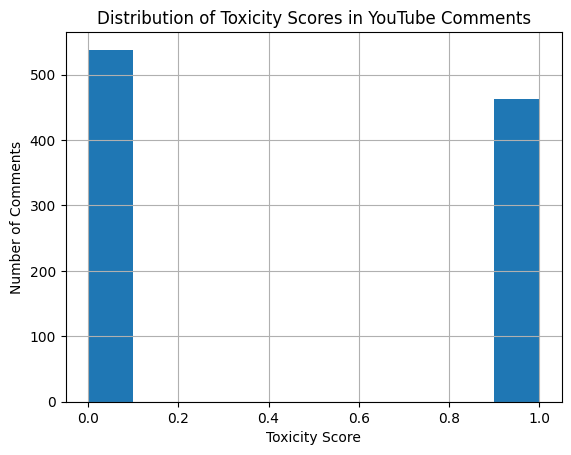

In [9]:
toxicity = df['IsToxic']

toxicity_numeric = toxicity.astype(int)

plt.hist(toxicity_numeric)
plt.xlabel('Toxicity Score')
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxicity Scores in YouTube Comments')
plt.grid(True)
plt.show()

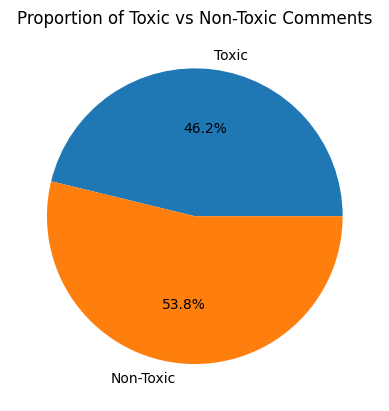

In [10]:
n_toxic = len(df[toxicity_numeric > 0.5])
n_nontoxic = len(df) - n_toxic

labels = ['Toxic', 'Non-Toxic']

pie_sizes = [n_toxic / len(df), n_nontoxic / len(df)]

plt.pie(pie_sizes, labels=labels, autopct="%1.1f%%")
plt.title('Proportion of Toxic vs Non-Toxic Comments')
plt.show()

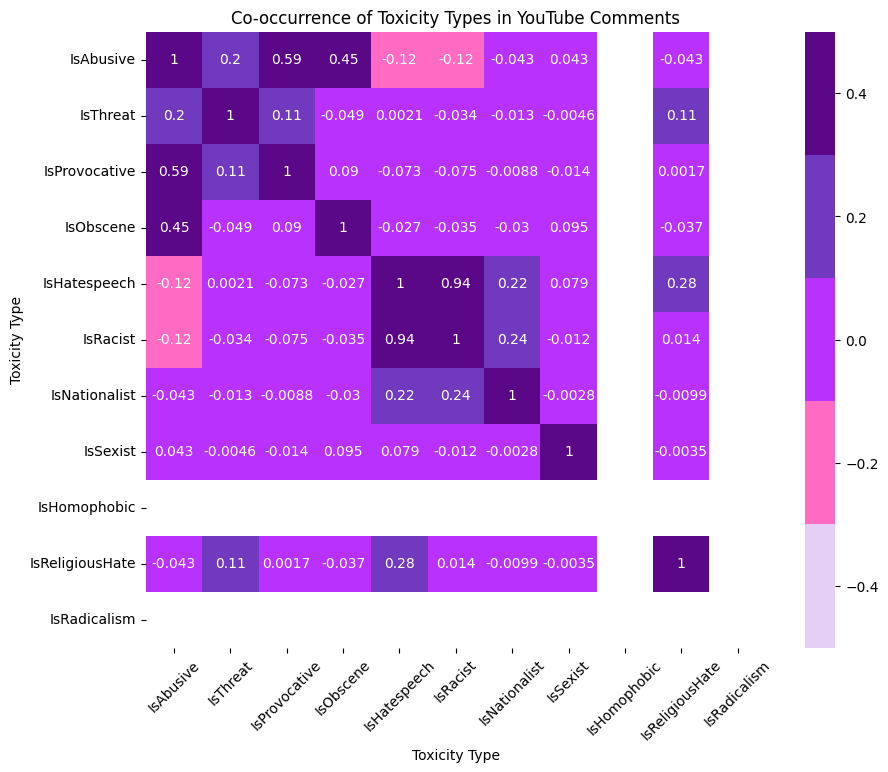

In [11]:
from matplotlib.colors import ListedColormap

dark_set2 = ['#E5CFF7', '#FF6AC2','#B931FC', '#713ABE', '#5B0888']
dark_cmap = ListedColormap(dark_set2)

norm = plt.Normalize(vmin=-0.5, vmax=0.5)

toxic_labels = ['IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech',
                'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']
toxicity_df = df[toxic_labels]

cooccurrence_matrix = toxicity_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cooccurrence_matrix, annot=True, cmap=dark_cmap, norm=norm)
plt.xlabel('Toxicity Type')
plt.ylabel('Toxicity Type')
plt.title('Co-occurrence of Toxicity Types in YouTube Comments')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

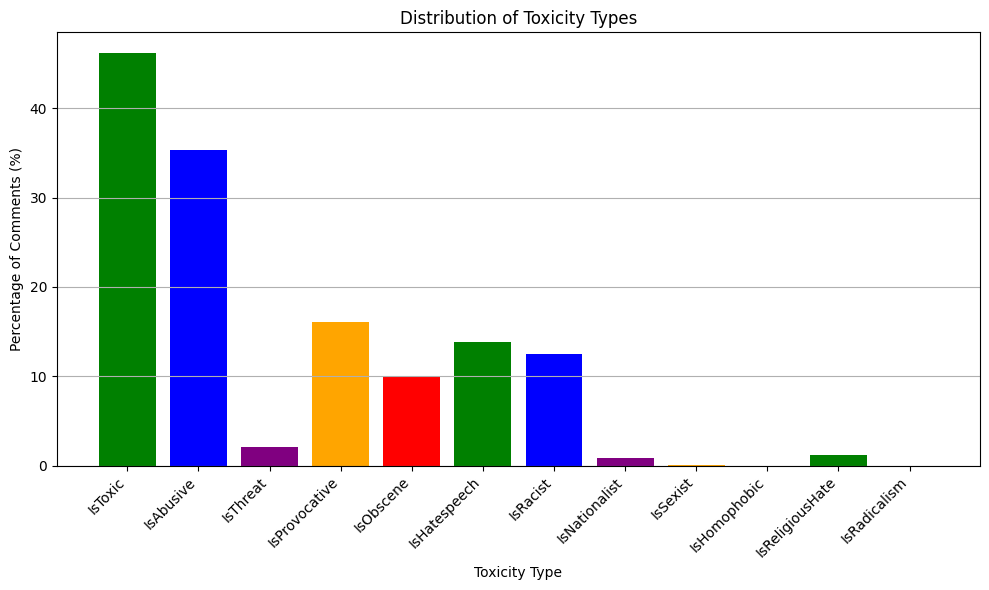

In [12]:
import matplotlib.cm as cm

toxic_types = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
               'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
               'IsReligiousHate', 'IsRadicalism']

colors = ['green', 'blue', 'purple', 'orange', 'red']

n_comments = len(df)
percentages = []
for col in toxic_types:
  n_toxic = len(df[df[col] == 1])
  percentage = (n_toxic / n_comments) * 100
  percentages.append(percentage)

plt.figure(figsize=(10, 6))
plt.bar(toxic_types, percentages, color=colors)
plt.xlabel('Toxicity Type')
plt.ylabel('Percentage of Comments (%)')
plt.title('Distribution of Toxicity Types')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
unique_values = set(df['IsToxic'])

# Count the total number of elements
total_elements = len(df)

# Check if there are duplicates based on set vs. list length
if len(unique_values) != total_elements:
  print("There are duplicate values in the column.")
else:
  print("No duplicate values found.")

There are duplicate values in the column.


In [14]:
# Check for duplicate comments
duplicate_rows = df[df.duplicated(subset=['Text'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

Duplicate rows based on 'Text' column:
                      CommentId      VideoId           Text  IsToxic  \
592        UgiXm5jxvkdIxHgCoAEC  cT14IbTDW2c  RUN THEM OVER     True   
642  Ugxen2QgJYhNiRrMegR4AaABAg  cT14IbTDW2c  run them over     True   
657  UgxXtUmfp0rdwXB8qld4AaABAg  cT14IbTDW2c  run them over     True   
677  UgyjhPsMlWKlFNmG-h94AaABAg  cT14IbTDW2c  run them over     True   
699  UgzFZGnqcjZcW7wejI54AaABAg  cT14IbTDW2c  RUN THEM OVER     True   

     IsAbusive  IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
592       True     False           True      False         False     False   
642       True      True          False      False         False     False   
657       True     False           True      False         False     False   
677       True     False           True      False         False     False   
699       True     False           True      False         False     False   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate

In [15]:
# Drop duplicate comments
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)

In [16]:
# Confirm duplicates are removed
print("Number of rows after removing duplicates:", len(df))

# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True, inplace=True)

Number of rows after removing duplicates: 997


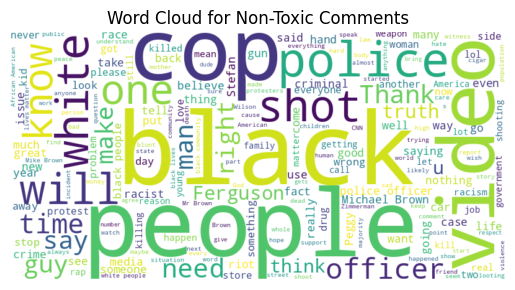

In [17]:
from wordcloud import WordCloud

non_toxic_comments = ' '.join(df[~df['IsToxic']]['Text'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

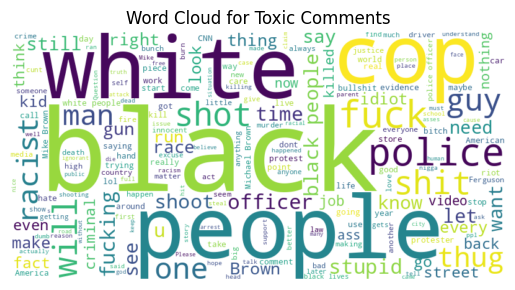

In [18]:
toxic_comments = ' '.join(df[df['IsToxic']]['Text'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

In [19]:
duplicate_rows = df[df.duplicated(subset=['VideoId'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

Duplicate rows based on 'Text' column:
                CommentId      VideoId  \
0    Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1    Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2    Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3    Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4    Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   
..                    ...          ...   
992  Ugi5ADt10EdDz3gCoAEC  XRuCW80L9mA   
993  Ugifh2DMhBbDkHgCoAEC  XRuCW80L9mA   
994  Ugj_plbGBjjzYXgCoAEC  XRuCW80L9mA   
995  Ugj0bah1De8xy3gCoAEC  XRuCW80L9mA   
996  UgjBJKQSoQMQ6ngCoAEC  XRuCW80L9mA   

                                                  Text  IsToxic  IsAbusive  \
0    If only people would just take a step back and...    False      False   
1    Law enforcement is not trained to shoot to app...     True       True   
2    \nDont you reckon them 'black lives matter' ba...     True       True   
3    There are a very large number of people who do...    False      False   
4    The Arab dude is absolutely right, he should h...    False   

In [20]:
df['VideoId'].unique()

array(['04kJtp6pVXI', '4rCweDxDqdw', '5vF4si3hoRA', '8HB18hZrhXc',
       '9pr1oE34bIM', 'bUgKZMSxr3E', 'cT14IbTDW2c', 'dDbRyFIkNII',
       'dG7mZQvaQDk', 'Dt9-byUhPdg', '#NAME?', 'TZxEyoplYbI',
       'XRuCW80L9mA'], dtype=object)

In [21]:
df['IsToxic'] = df['IsToxic'].astype(int)

In [22]:
import re

import nltk
stopwords = nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')

    stop_words = stopwords.words('english')
    tokens = text.split()
    filtered_words = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_words)
    return text

In [24]:
df['Text'] = df['Text'].map(lambda com : clean_text(com))

In [25]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,people would take step back make case anyone e...,0,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,law enforcement trained shoot apprehend traine...,1,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,dont reckon black lives matter banners held wh...,1,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,large number people like police officers calle...,0,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,arab dude absolutely right shot 6 extra time s...,0,False,False,False,False,False,False,False,False,False,False,False


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=5000, stop_words='english')
X = vect.fit_transform(df['Text'])
y = df['IsToxic']

In [27]:
!pip install scikit-learn==1.0.2
!pip install imblearn

In [28]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [29]:
X_resampled

<84x4304 sparse matrix of type '<class 'numpy.float64'>'
	with 591 stored elements in Compressed Sparse Row format>

In [30]:
y_resampled

0     0
1     0
2     0
3     0
4     0
     ..
79    1
80    1
81    1
82    1
83    1
Name: IsToxic, Length: 84, dtype: int64

In [31]:
# Convert the oversampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled.todense(), columns=vect.get_feature_names_out())
df_resampled['Toxic'] = y_resampled

# Check the distribution after oversampling
toxic_distribution_after = df_resampled['Toxic'].value_counts()
print("\nDistribution after SMOTE:")
print(toxic_distribution_after)


Distribution after SMOTE:
Toxic
0    59
1    25
Name: count, dtype: int64


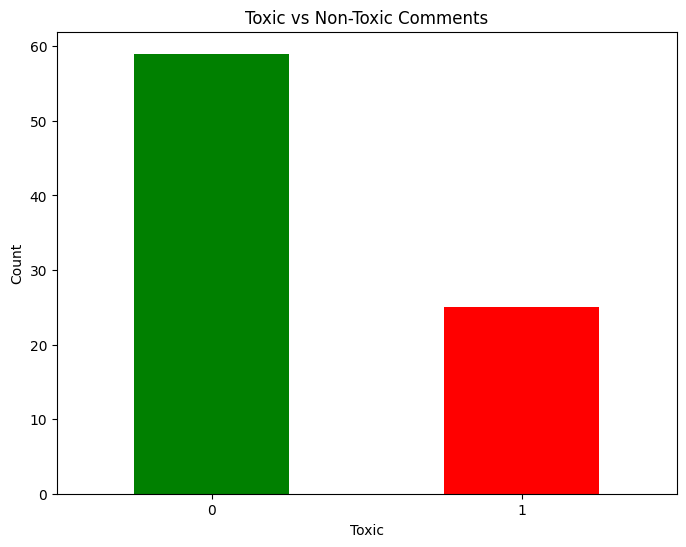

In [32]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df_resampled['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [34]:
X_train

<67x4304 sparse matrix of type '<class 'numpy.float64'>'
	with 474 stored elements in Compressed Sparse Row format>

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [46]:
max_features = 10000

embedding_dim = 128

max_len = 200

In [48]:
model = Sequential()

# Embedding layer (convert tokens to vectors)
model.add(Embedding(max_features, embedding_dim, input_length=max_len))

# LSTM layer (capture sequential information)
lstm_units = 64
model.add(LSTM(units=lstm_units))

# Dense layer (classification)
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [54]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print("Validation Accuracy:", accuracy)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.6675 - loss: 0.6369 - val_accuracy: 0.7647 - val_loss: 0.5535
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.6870 - loss: 0.6230 - val_accuracy: 0.7647 - val_loss: 0.5490
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6909 - loss: 0.6225 - val_accuracy: 0.7647 - val_loss: 0.5470
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.7105 - loss: 0.6061 - val_accuracy: 0.7647 - val_loss: 0.5472
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.6831 - loss: 0.6315 - val_accuracy: 0.7647 - val_loss: 0.5535
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step - accuracy: 0.7647 - loss: 0.5535
Validation Accuracy: 0.7647058963775635
